In [ ]:
# in the upcoming steps i will clean the data, modify it and do feature engineering to make the dataset optimum as much as possible and avoid any errors.

In [3]:
#CLEANING

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df_notcleaned = pd.read_csv("Laps.csv")

# Drop unnecessary columns to prevent errors in my coding and some of them are not needed
columns_to_drop = ['IsPersonalBest', 'IsAccurate', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time','Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'LapTime', 'Time']
df = df_notcleaned.drop(columns=columns_to_drop)

# Convert 'compound' column to numeric because categorical columns may interupt the model
Compound_mapping = {'MEDIUM': 1, 'HARD': 2, 'SOFT': 3}
df['Compound'] = df['Compound'].map(Compound_mapping)

#Handling missing values
df.dropna(inplace=True)

#Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Team', 'Driver', 'EventName'], drop_first=True)


# FEATURE ENGINEERING: Difference between the speed at the finish line and start line
df['SPEE_DIFF'] = df['SpeedFL'] - df['SpeedST']

# Print the cleaned Data
print("Cleaned Data:")
print(df.head())



# Save the cleaned data to a new CSV file
df.to_csv("df.csv", index=False)


# Return the cleaned DataFrame
df

Cleaned Data:
   DriverNumber  LapNumber  SpeedI1  SpeedI2  SpeedFL  SpeedST  Compound  \
0             1          1    232.0    231.0    278.0    252.0       3.0   
1             1          2    227.0    238.0    278.0    288.0       3.0   
3             1          4    228.0    238.0    278.0    289.0       3.0   
5             1          6    229.0    239.0    279.0    291.0       3.0   
6             1          7    230.0    239.0    279.0    293.0       3.0   

   TyreLife FreshTyre  Stint  ... EventName_Belgian Grand Prix  \
0       4.0     False    1.0  ...                        False   
1       5.0     False    1.0  ...                        False   
3       7.0     False    1.0  ...                        False   
5       9.0     False    1.0  ...                        False   
6      10.0     False    1.0  ...                        False   

   EventName_British Grand Prix EventName_Canadian Grand Prix  \
0                         False                         False   
1 

,DriverNumber,LapNumber,SpeedI1,SpeedI2,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,Stint,...,EventName_Belgian Grand Prix,EventName_British Grand Prix,EventName_Canadian Grand Prix,EventName_Dutch Grand Prix,EventName_Hungarian Grand Prix,EventName_Miami Grand Prix,EventName_Monaco Grand Prix,EventName_Saudi Arabian Grand Prix,EventName_Spanish Grand Prix,SPEE_DIFF
0,1,1,232.0,231.0,278.0,252.0,3.0,4.0,False,1.0,...,False,False,False,False,False,False,False,False,False,26.0
1,1,2,227.0,238.0,278.0,288.0,3.0,5.0,False,1.0,...,False,False,False,False,False,False,False,False,False,-10.0
3,1,4,228.0,238.0,278.0,289.0,3.0,7.0,False,1.0,...,False,False,False,False,False,False,False,False,False,-11.0
5,1,6,229.0,239.0,279.0,291.0,3.0,9.0,False,1.0,...,False,False,False,False,False,False,False,False,False,-12.0
6,1,7,230.0,239.0,279.0,293.0,3.0,10.0,False,1.0,...,False,False,False,False,False,False,False,False,False,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14403,18,52,289.0,266.0,298.0,306.0,3.0,18.0,True,5.0,...,False,False,False,True,False,False,False,False,False,-8.0
14404,18,53,287.0,267.0,300.0,304.0,3.0,19.0,True,5.0,...,False,False,False,True,False,False,False,False,False,-4.0
14405,18,54,288.0,266.0,299.0,306.0,3.0,20.0,True,5.0,...,False,False,False,True,False,False,False,False,False,-7.0
14406,18,55,287.0,267.0,300.0,305.0,3.0,21.0,True,5.0,...,False,False,False,True,False,False,False,False,False,-5.0


In [ ]:
#now i will explore the data and use visualization and different graphs

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DriverNumber                        10237 non-null  int64  
 1   LapNumber                           10237 non-null  int64  
 2   SpeedI1                             10237 non-null  float64
 3   SpeedI2                             10237 non-null  float64
 4   SpeedFL                             10237 non-null  float64
 5   SpeedST                             10237 non-null  float64
 6   Compound                            10237 non-null  float64
 7   TyreLife                            10237 non-null  float64
 8   FreshTyre                           10237 non-null  bool   
 9   Stint                               10237 non-null  float64
 10  LapStartTime                        10237 non-null  object 
 11  TrackStatus         

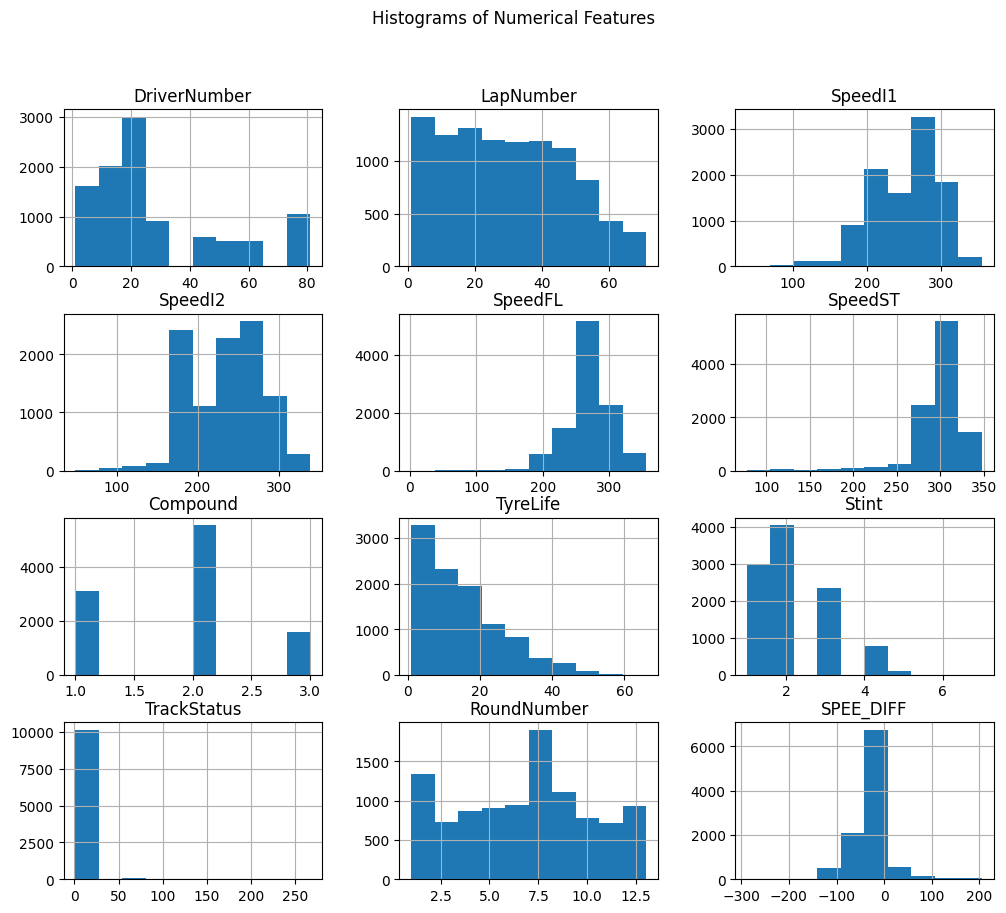

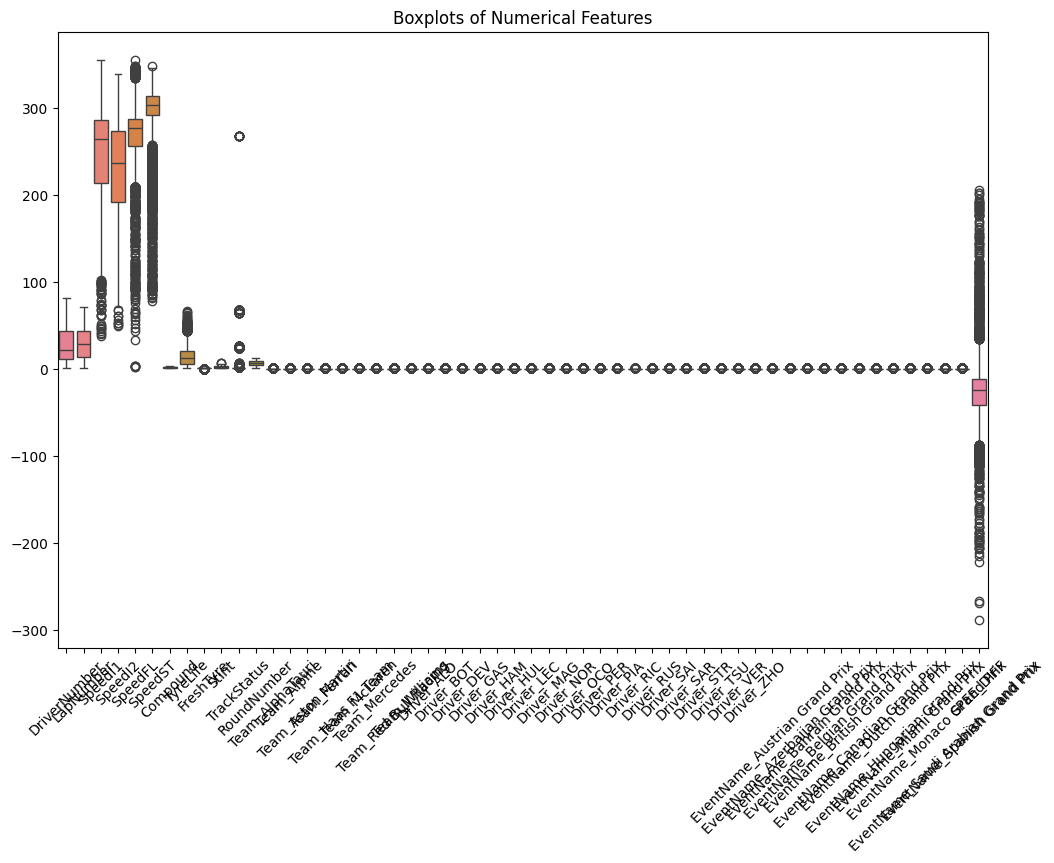

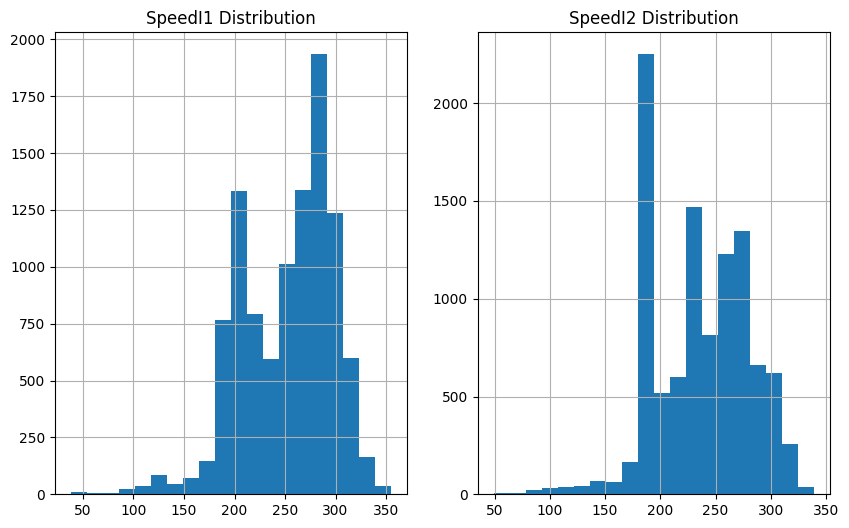

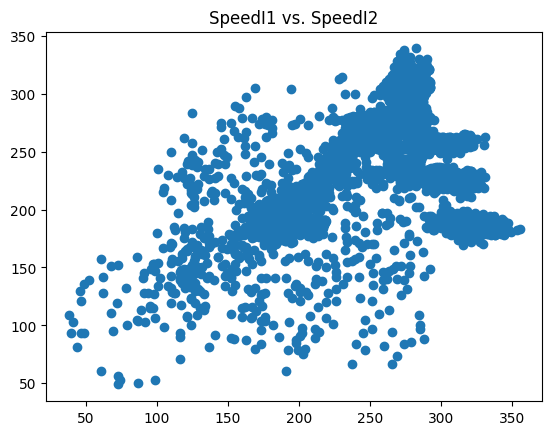

SpeedI1
38.0     109.0
40.0      93.0
41.0     103.0
44.0      81.0
46.0     130.0
         ...  
346.0    183.0
347.0    185.5
349.0    181.0
353.0    182.0
355.0    183.0
Name: SpeedI2, Length: 275, dtype: float64


In [4]:

#Exploration and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('df.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Describe the dataset's numerical features
print("\nNumerical Features Description:")
print(df.describe())

# Describe the dataset's categorical features
print("\nCategorical Features Description:")
print(df.describe(include=['object']))


# Conduct exploratory data analysis (EDA)
# Histograms of numerical features
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots of numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


# Exploring the  data distribution
plt.figure(figsize=(10, 6))
plt.subplot(121)
df['SpeedI1'].hist(bins=20)
plt.title("SpeedI1 Distribution")
plt.subplot(122)
df['SpeedI2'].hist(bins=20)
plt.title("SpeedI2 Distribution")
plt.show()

# the relationship between SpeedI1 and SpeedI2
plt.scatter(df['SpeedI1'], df['SpeedI2'])
plt.title("SpeedI1 vs. SpeedI2")
plt.show()

# The average points for the speeds
print(df.groupby('SpeedI1')['SpeedI2'].mean())

In [ ]:
# i will test different models

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset into a DataFrame
df = pd.read_csv('df.csv')

# Convert all columns to numeric, forcing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select features and target
X = df[['SpeedI1', 'SpeedI2', 'Compound', 'TyreLife', 'FreshTyre']]
y = df['SpeedFL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




from sklearn.feature_selection import RFE

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Initialize RFE
rfe = RFE(estimator=gb_classifier, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]

print("Selected features using RFE:")
print(selected_features_rfe)



# Fit Gradient Boosting classifier to get feature importance
gb_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importance_gb = gb_classifier.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_gb
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features based on importance
selected_features_gb = feature_importance_df.head(10)['Feature'].values

print("Selected features using Gradient Boosting feature importance:")
print(selected_features_gb)


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Train and evaluate models
models = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting,
    "K-Nearest Neighbors": knn,
    "Decision Tree": decision_tree
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.09
Random Forest Accuracy: 0.16
Gradient Boosting Accuracy: 0.15
K-Nearest Neighbors Accuracy: 0.14
Decision Tree Accuracy: 0.14


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('df.csv')

# Convert all columns to numeric, forcing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy after tuning: {accuracy:.2f}")
print(f"Random Forest Precision after tuning: {precision:.2f}")
print(f"Random Forest Recall after tuning: {recall:.2f}")

# Evaluate using other metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
file='F1LAP'
joblib.dump(best_rf, "best_random_forest_model.pkl")
model=joblib.load(open("best_random_forest_model.pkl",'rb'))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMet

Random Forest Accuracy after tuning: 0.18
Random Forest Precision after tuning: 0.24
Random Forest Recall after tuning: 0.18
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         0
        63.0       0.00      0.00      0.00         0
        65.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
        83.0       0.00      0.00      0.00         1
        86.0       0.00      0.00      0.00         1
        90.0       0.00      0.00      0.00         1
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         1
        95.0       0.00      0.00      0.00         0
        98.0       0.00      0.00      0.00         1
       100.

['best_random_forest_model.pkl']